In [65]:
%matplotlib inline
import pandas as pd
import numpy as np
import h5py

field: 1, well: 1


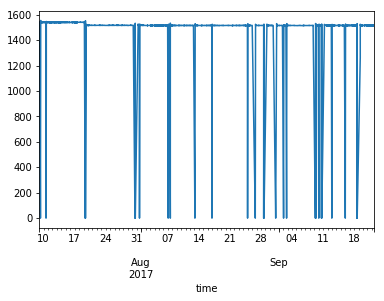

In [92]:
filename = '/home/ubuntu/data/esp_data_offline.h5'

sensors = ['IDH', 'VDH', 'EDH', 'PINP', 'PCAS', 'YRUN']
with h5py.File(filename) as f:
    for field in f:
        for well in f[str(field)]: 
            print('field: {}, well: {}'.format(field, well))
            well_id = '{}_{}'.format(field, well)
            well_data = {}
            for data_id in f['{}/{}'.format(field, well)]:
                # make a dataframe with this sensor's data
                data_id = data_id.strip()
                sensor_data = {}
                data = f['{}/{}/{}'.format(field, well, data_id)][...]
                sensor_data['time'] = pd.to_datetime(data[:,0], unit='s')
                sensor_data[data_id] = data[:,1]
                sensor_df = pd.DataFrame(sensor_data)
                sensor_df.set_index('time', inplace=True)
                sensor_df.sort_index(inplace=True)
                well_data[data_id] = sensor_df
                
                #print sensor_df
                sensor_rs = pd.DataFrame()
                temp = sensor_df[data_id].resample('S').interpolate(method='time')
                #sensor_rs[data_id] = sensor_df[data_id].resample('T').pad(limit=6)
                #print temp
                temp.plot()
                break
            break
        break
